# House price study

# Objectives
* Answer business requirement 1:
    * The client is interested in discovering how the house attributes correlate with the sale price. Therefore, the client expects data visualisations of the correlated variables against the sale price to show that.

# Inputs* outputs/datasets/collection/house_prices_recordsn.csv
# Outputs* generate code that answers business requirement 1 and can be used to build the Streamlit App



# Change working directory
* We need to change the working directory from its current folder to its parent folder
    * We access the current directory with os.getcwd()


In [2]:
import os
current_dir = os.getcwd()
current_dir

'/workspaces/heritage-housing-issues/jupyter_notebooks'

We want to make the parent of the current directory the new current directory

* os.path.dirname() gets the parent directory
* os.chir() defines the new current directory

In [3]:
os.chdir(os.path.dirname(current_dir))
print("You set a new current directory")

You set a new current directory


Confirm the new current directory

In [4]:
current_dir = os.getcwd()
current_dir

'/workspaces/heritage-housing-issues'

***

# Load Data

In [5]:
import pandas as pd
df = pd.read_csv(f"inputs/datasets/raw/house-price-20211124T154130Z-001/house-price/house_prices_records.csv")
df

,1stFlrSF,2ndFlrSF,BedroomAbvGr,BsmtExposure,BsmtFinSF1,BsmtFinType1,BsmtUnfSF,EnclosedPorch,GarageArea,GarageFinish,...,LotFrontage,MasVnrArea,OpenPorchSF,OverallCond,OverallQual,TotalBsmtSF,WoodDeckSF,YearBuilt,YearRemodAdd,SalePrice
0,856,854.0,3.0,No,706,GLQ,150,0.0,548,RFn,...,65.0,196.0,61,5,7,856,0.0,2003,2003,208500
1,1262,0.0,3.0,Gd,978,ALQ,284,NaN,460,RFn,...,80.0,0.0,0,8,6,1262,NaN,1976,1976,181500
2,920,866.0,3.0,Mn,486,GLQ,434,0.0,608,RFn,...,68.0,162.0,42,5,7,920,NaN,2001,2002,223500
3,961,NaN,NaN,No,216,ALQ,540,NaN,642,Unf,...,60.0,0.0,35,5,7,756,NaN,1915,1970,140000
4,1145,NaN,4.0,Av,655,GLQ,490,0.0,836,RFn,...,84.0,350.0,84,5,8,1145,NaN,2000,2000,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,953,694.0,3.0,No,0,Unf,953,NaN,460,RFn,...,62.0,0.0,40,5,6,953,0.0,1999,2000,175000
1456,2073,0.0,NaN,No,790,ALQ,589,NaN,500,Unf,...,85.0,119.0,0,6,6,1542,NaN,1978,1988,210000
1457,1188,1152.0,4.0,No,275,GLQ,877,NaN,252,RFn,...,66.0,0.0,60,9,7,1152,NaN,1941,2006,266500
1458,1078,0.0,2.0,Mn,49,NaN,0,112.0,240,Unf,...,68.0,0.0,0,6,5,1078,NaN,1950,1996,142125


# Data Exploration

We will check the data again in more readable environment to undestand the data better

In [6]:
from ydata_profiling import ProfileReport
pandas_report = ProfileReport(df=df, minimal=True)
pandas_report.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

# Correlation Study

Before we look at correlations between variables we need to fill missing values

In [7]:
df.fillna(0, inplace=True)

Now we can fit and transform the data

In [8]:
from feature_engine.encoding import OneHotEncoder
encoder = OneHotEncoder(variables=df.columns[df.dtypes=='object'].to_list(), drop_last=False)
df_cs = encoder.fit_transform(df)
print(df_cs.shape)
df_cs.head(3)

(1460, 42)


,1stFlrSF,2ndFlrSF,BedroomAbvGr,BsmtFinSF1,BsmtUnfSF,EnclosedPorch,GarageArea,GarageYrBlt,GrLivArea,LotArea,...,BsmtFinType1_LwQ,GarageFinish_RFn,GarageFinish_Unf,GarageFinish_0,GarageFinish_Fin,GarageFinish_None,KitchenQual_Gd,KitchenQual_TA,KitchenQual_Ex,KitchenQual_Fa
0,856,854.0,3.0,706,150,0.0,548,2003.0,1710,8450,...,0,1,0,0,0,0,1,0,0,0
1,1262,0.0,3.0,978,284,0.0,460,1976.0,1262,9600,...,0,1,0,0,0,0,0,1,0,0
2,920,866.0,3.0,486,434,0.0,608,2001.0,1786,11250,...,0,1,0,0,0,0,1,0,0,0


We use .corr() for spearman and pearson methods, and investigate the top 10 correlations

First we use spearman

In [9]:
corr_spearman = df_cs.corr(method='spearman')['SalePrice'].sort_values(key=abs, ascending=False)[1:].head(10)
corr_spearman

OverallQual       0.809829
GrLivArea         0.731310
YearBuilt         0.652682
GarageArea        0.649379
GarageYrBlt       0.634095
TotalBsmtSF       0.602725
KitchenQual_TA   -0.581803
1stFlrSF          0.575408
YearRemodAdd      0.571159
KitchenQual_Gd    0.478583
Name: SalePrice, dtype: float64

And the same for pearson

In [10]:
corr_pearson = df_cs.corr(method='pearson')['SalePrice'].sort_values(key=abs, ascending=False)[1:].head(10)
corr_pearson

OverallQual       0.790982
GrLivArea         0.708624
GarageArea        0.623431
TotalBsmtSF       0.613581
1stFlrSF          0.605852
YearBuilt         0.522897
KitchenQual_TA   -0.519298
YearRemodAdd      0.507101
KitchenQual_Ex    0.504094
MasVnrArea        0.472614
Name: SalePrice, dtype: float64

We will consider the most correlated variables

In [11]:
corr_var = 5
set(corr_pearson[:corr_var].index.to_list() + corr_spearman[:corr_var].index.to_list())

{'1stFlrSF',
 'GarageArea',
 'GarageYrBlt',
 'GrLivArea',
 'OverallQual',
 'TotalBsmtSF',
 'YearBuilt'}

# Distribution by HousePrice variable

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

Let's select the top variables for SalePrice correlation

In [13]:
corr_list = ['1stFlrSF',
 'GarageArea',
 'GarageYrBlt',
 'GrLivArea',
 'OverallQual',
 'TotalBsmtSF',
 'YearBuilt']

In [14]:
df_corr = df.filter(corr_list + ['SalePrice'])
df_corr.head(3)

,1stFlrSF,GarageArea,GarageYrBlt,GrLivArea,OverallQual,TotalBsmtSF,YearBuilt,SalePrice
0,856,548,2003.0,1710,7,856,2003,208500
1,1262,460,1976.0,1262,6,1262,1976,181500
2,920,608,2001.0,1786,7,920,2001,223500


## Visualizing SalePrice

We will see how the SalePrice variable looks against the strongest correlated variables

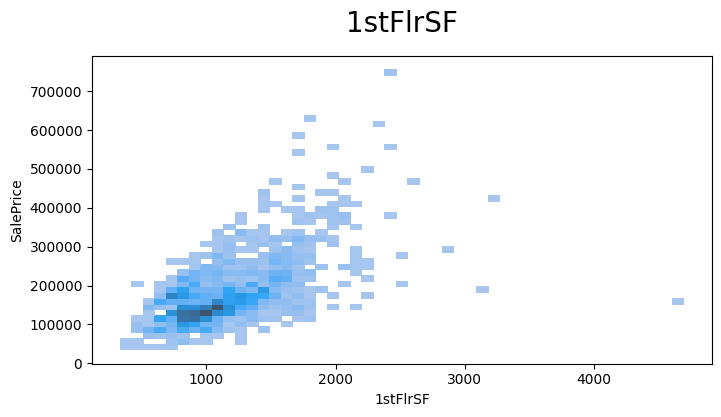

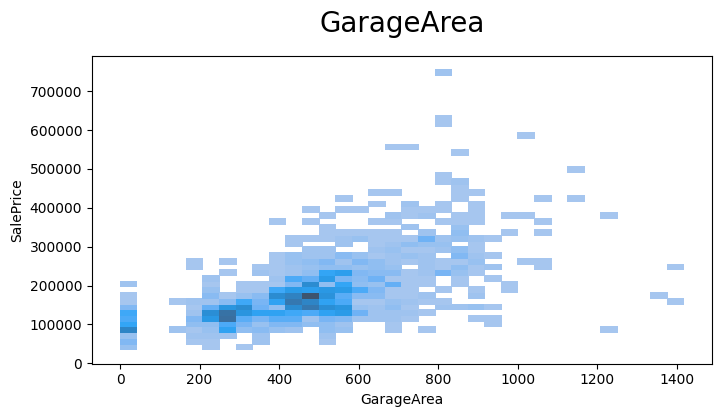

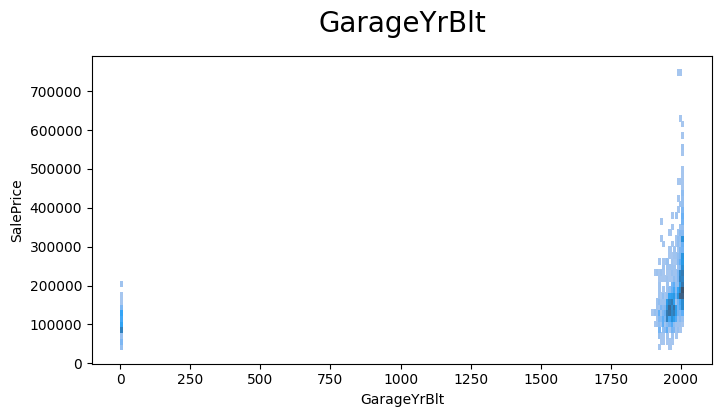

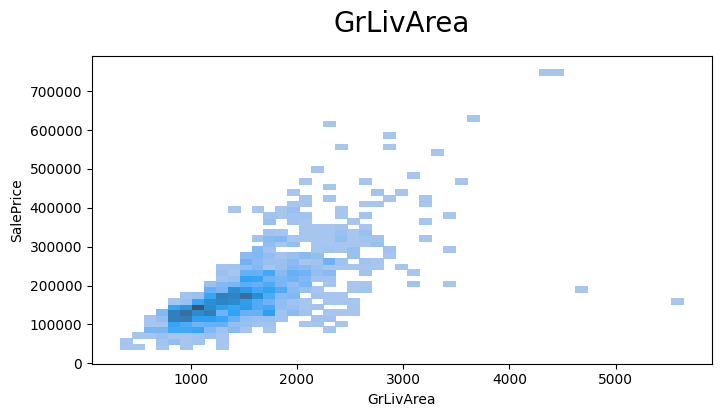

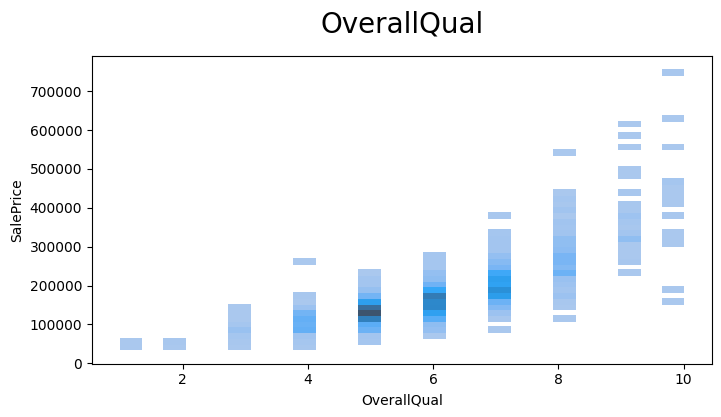

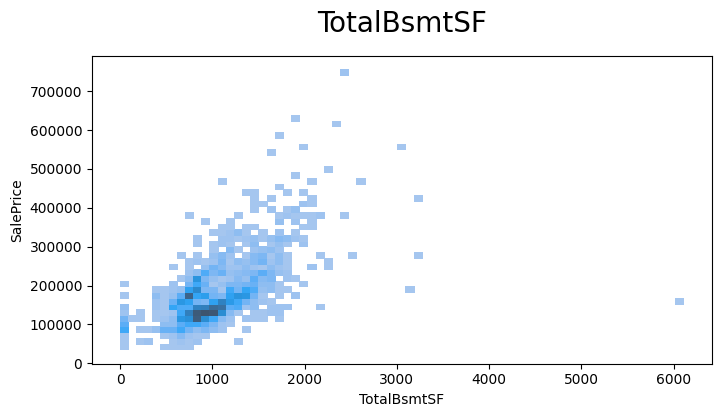

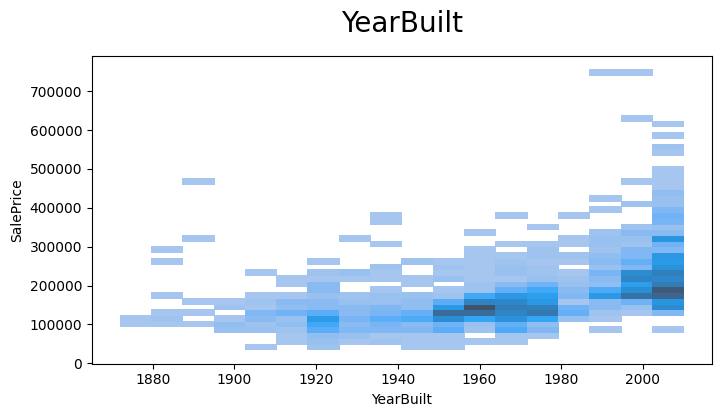

In [18]:
for col in corr_list:
        fig, axes = plt.subplots(figsize=(8, 4))
        axes = sns.histplot(data=df_corr, x=col, y='SalePrice')
        plt.title(f"{col}", fontsize=20, y=1.05)
        plt.show()

Let's look how it correlates with OverallQual variable

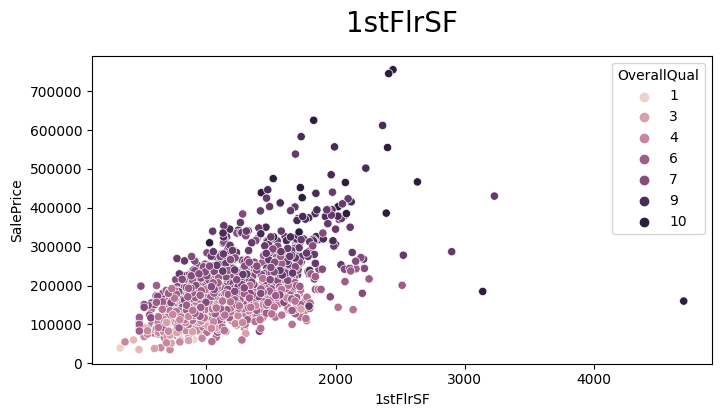

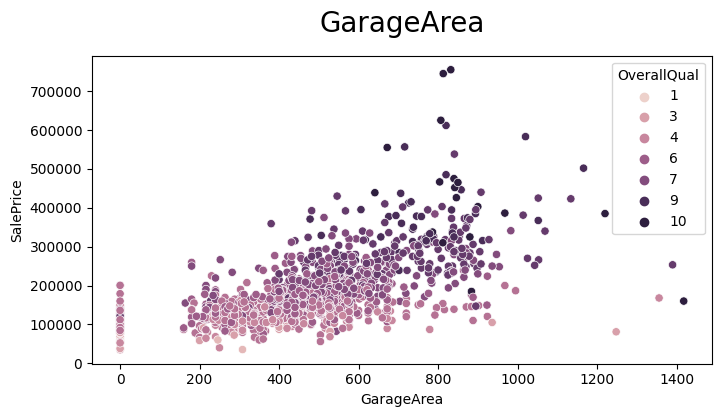

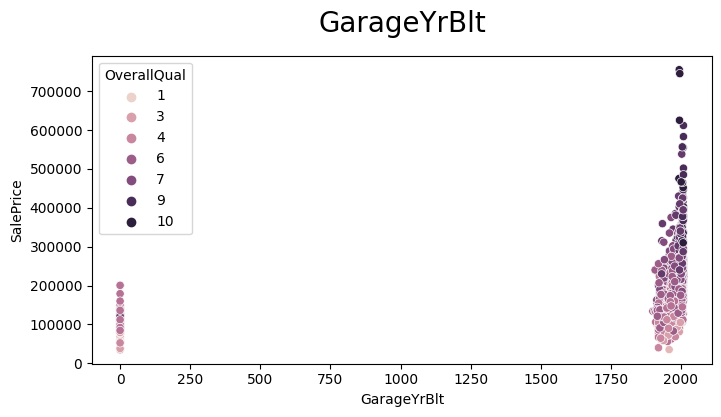

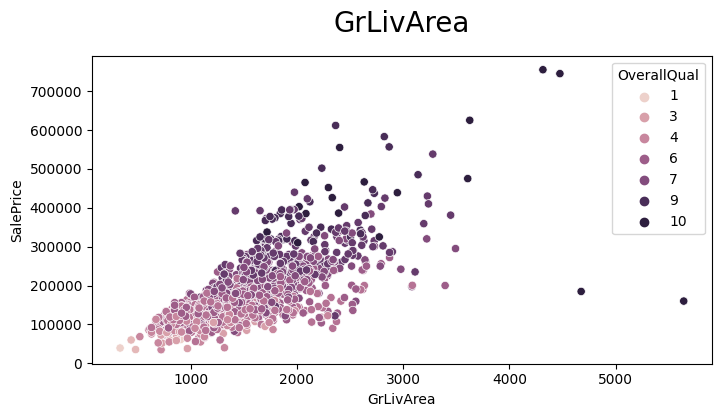

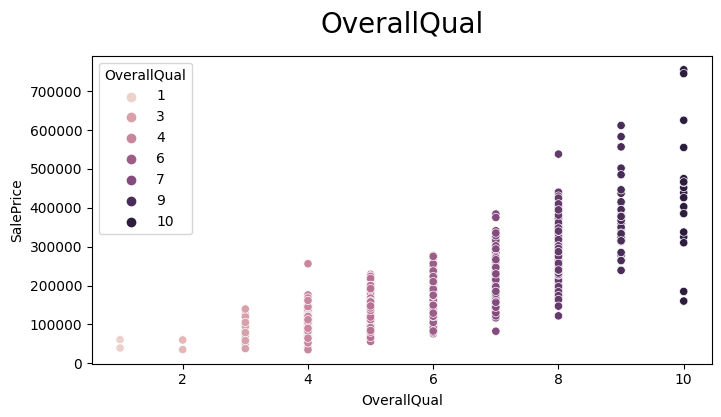

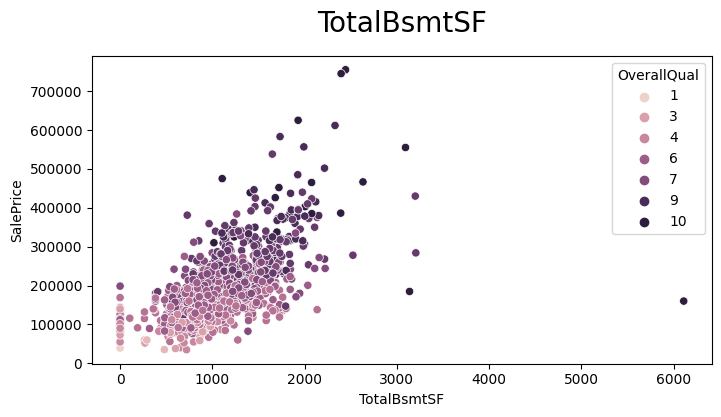

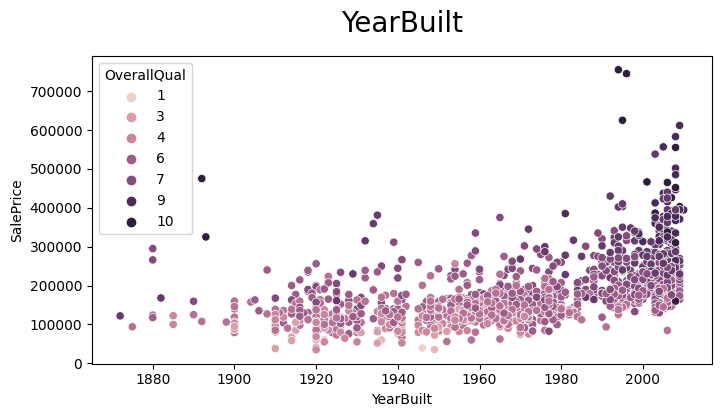

In [19]:
for col in corr_list:
        fig, axes = plt.subplots(figsize=(8, 4))
        axes = sns.scatterplot(data=df_corr, x=col, y='SalePrice', hue='OverallQual')
        plt.title(f"{col}", fontsize=20, y=1.05)
        plt.show()

# Conclussion and Next Steps

* Seems like the Overall Quality of the house is the strongest correlation to the Sale Price

* There is a steady, slow increase of Sale Price as the years increase

* Also larger square feet means Sale Price goes up 